# Experimental Evaluation of Credit Scoring 

In [37]:
import pandas as pd
import numpy as np
import pandas_profiling as profiling
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, mean_squared_error, classification_report, accuracy_score


#### Loading German Credit Dataset

In [38]:
df = pd.read_csv('german.csv', header = None)
print(df.shape)
df.head()

(1000, 21)


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


#### Renaming header's name

In [39]:
header_name=["status", "duration","credit_history","purpose","credit_amount","savings_account","employment_duration","installment_rate","personal_status&sex","guarantors","residence_duration","property","age","installment_plan","housing","existing_credit","job","people","telephone","foreign_worker","result"]

df.columns = header_name

In [40]:
print(df.shape)
df.head()

(1000, 21)


,status,duration,credit_history,purpose,credit_amount,savings_account,employment_duration,installment_rate,personal_status&sex,guarantors,...,property,age,installment_plan,housing,existing_credit,job,people,telephone,foreign_worker,result
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


#### Converting all categorical data to numerical data

In [41]:
# fetch all categorical feature

df_cat_cols = list(df.columns[df.dtypes == 'object'])
print("List of categorical columns :- ", df_cat_cols)

List of categorical columns :-  ['status', 'credit_history', 'purpose', 'savings_account', 'employment_duration', 'personal_status&sex', 'guarantors', 'property', 'installment_plan', 'housing', 'job', 'telephone', 'foreign_worker']


In [42]:
le = LabelEncoder()

for i in df_cat_cols:
    df[i] = le.fit_transform(df[i])

In [43]:
df.head()

,status,duration,credit_history,purpose,credit_amount,savings_account,employment_duration,installment_rate,personal_status&sex,guarantors,...,property,age,installment_plan,housing,existing_credit,job,people,telephone,foreign_worker,result
0,0,6,4,4,1169,4,4,4,2,0,...,0,67,2,1,2,2,1,1,0,1
1,1,48,2,4,5951,0,2,2,1,0,...,0,22,2,1,1,2,1,0,0,2
2,3,12,4,7,2096,0,3,2,2,0,...,0,49,2,1,1,1,2,0,0,1
3,0,42,2,3,7882,0,3,2,2,2,...,1,45,2,2,1,2,2,0,0,1
4,0,24,3,0,4870,0,2,3,2,0,...,3,53,2,2,2,2,2,0,0,2


#### Explaratory Data Analysis

In [44]:
df2 = df.copy()

In [45]:
### Pandas-Profiling

profiling.ProfileReport(df)

#### Outlier Detection and removal

60.0 20.0
2


<AxesSubplot:xlabel='age'>

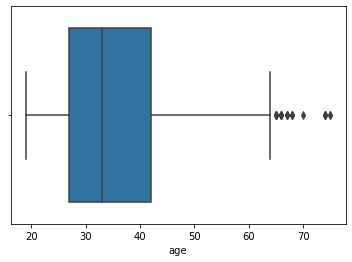

In [46]:
max_age = df2['age'].quantile(0.95)
min_age = df2['age'].quantile(0.01)

print(max_age, min_age)
print((df2['age'] < min_age).sum())

sns.boxplot(x=df2['age'])

#### Divide the dataset into independent and dependent variable

In [47]:
X = df2.iloc[ : , 0:20]
X.head()

,status,duration,credit_history,purpose,credit_amount,savings_account,employment_duration,installment_rate,personal_status&sex,guarantors,residence_duration,property,age,installment_plan,housing,existing_credit,job,people,telephone,foreign_worker
0,0,6,4,4,1169,4,4,4,2,0,4,0,67,2,1,2,2,1,1,0
1,1,48,2,4,5951,0,2,2,1,0,2,0,22,2,1,1,2,1,0,0
2,3,12,4,7,2096,0,3,2,2,0,3,0,49,2,1,1,1,2,0,0
3,0,42,2,3,7882,0,3,2,2,2,4,1,45,2,2,1,2,2,0,0
4,0,24,3,0,4870,0,2,3,2,0,4,3,53,2,2,2,2,2,0,0


In [49]:
le = LabelEncoder()
df2['result'] = le.fit_transform(df2['result'])

y = df2['result']
y.head()

0    0
1    1
2    0
3    0
4    1
Name: result, dtype: int64

#### Normalization 

In [50]:
scaler=preprocessing.MinMaxScaler()
scalardata=scaler.fit_transform(X)

In [51]:
print(scalardata)

[[0.         0.02941176 1.         ... 0.         1.         0.        ]
 [0.33333333 0.64705882 0.5        ... 0.         0.         0.        ]
 [1.         0.11764706 1.         ... 1.         0.         0.        ]
 ...
 [1.         0.11764706 0.5        ... 0.         0.         0.        ]
 [0.         0.60294118 0.5        ... 0.         1.         0.        ]
 [0.33333333 0.60294118 1.         ... 0.         0.         0.        ]]


#### Spliting data set into X_train, y_train, X_test and y_test

In [52]:
np.random.seed = 300
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((700, 20), (700,), (300, 20), (300,))

#### Building model for Logistic Regression

In [53]:
lr = LogisticRegression(solver='lbfgs', max_iter=100)
logisticmodel = lr.fit(X_train, y_train)

print("model score: %.3f" % logisticmodel.score(X_test, y_test))

model score: 0.763


C:\Users\Raj Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Creating Confusing Matrix

In [54]:
y_pred_logistic = logisticmodel.predict(X_test)

In [55]:
print(confusion_matrix(y_test, y_pred_logistic))
print(classification_report(y_test, y_pred_logistic))
print("Accuracy Value of Decision Tree : %.2f" % logisticmodel.score(X_test, y_test))

[[188  29]
 [ 42  41]]
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       217
           1       0.59      0.49      0.54        83

    accuracy                           0.76       300
   macro avg       0.70      0.68      0.69       300
weighted avg       0.75      0.76      0.76       300

Accuracy Value of Decision Tree : 0.76


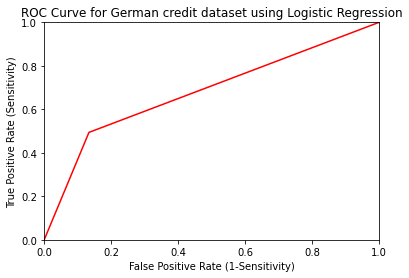

In [61]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thres = roc_curve(y_test, y_pred_logistic)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title("ROC Curve for German credit dataset using Logistic Regression")
plt.xlabel('False Positive Rate (1-Sensitivity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot(fpr, tpr, color='red')
plt.show()

#### Building model for Decision Tree

In [57]:
from sklearn import tree
decisionModel = tree.DecisionTreeClassifier(max_depth = 5, criterion = "gini")
decisionModel.fit(X_train, y_train)

print("model test score is : %.4f" % decisionModel.score(X_test, y_test))

model test score is : 0.7433


#### Creating a Confusing Matrix

In [58]:
y_pred = decisionModel.predict(X_test)

In [59]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy Value of Decision Tree : %.2f" % decisionModel.score(X_test, y_test))

[[181  36]
 [ 41  42]]
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       217
           1       0.54      0.51      0.52        83

    accuracy                           0.74       300
   macro avg       0.68      0.67      0.67       300
weighted avg       0.74      0.74      0.74       300

Accuracy Value of Decision Tree : 0.74


In [ ]:
tree.plot_tree(decisionModel)
plt.show()

#### Building model for Random Forest

In [64]:
randomFModel = RandomForestClassifier(criterion = "gini", max_features = "auto")
randomFModel.fit(X_train, y_train)
print("Accuracy on testing dataset %0.4f " %  randomFModel.score(X_test, y_test))

Accuracy on testing dataset 0.7867 


In [65]:
random_predict = randomFModel.predict(X_test)

print(classification_report(y_test, random_predict))
print("Accuracy of Random Forest is : %0.2f" % accuracy_score(y_test, random_predict))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       217
           1       0.67      0.45      0.54        83

    accuracy                           0.79       300
   macro avg       0.74      0.68      0.70       300
weighted avg       0.77      0.79      0.77       300

Accuracy of Random Forest is : 0.79


#### Creating Random Forest with best parameters

#### Creating AdaBoost Model

In [33]:
adboostModel = AdaBoostClassifier()
adboostModel.fit(X_train, y_train)

print("Accuracy on testing dataset %0.4f " %  adboostModel.score(X_test, y_test))

Accuracy on testing dataset 0.7667 


#### new AdaBoost model with grid search

In [ ]:
param_grid = {'learning_rate':[0.05, 0.1], 'n_estimators':[50, 100, 200]}
ada_grid = AdaBoostClassifier()
ada_grid_search = GridSearchCV(estimator = ada_grid, param_grid = param_grid, cv = 5)
ada_grid_result = ada_grid_search.fit(X_train, y_train)

print("Best Parameters are : ", ada_grid_search.best_params_)

In [ ]:
ada_best_parameter = AdaBoostClassifier(learning_rate = ada_grid_result.best_params_['learning_rate'], n_estimators = ada_grid_result.best_params_['n_estimators'])
ada_best_parameter.fit(X_train, y_train)

print("Accuracy on training set with best parameters : %0.2f " % ada_best_parameter.score(X_train, y_train))

In [ ]:
ada_predict = ada_best_parameter.predict(X_test)
print("Classification Report : ", classification_report(y_test, ada_predict))
print("Accuracy of new AdaBoost Model is : %.2f" % accuracy_score(y_test, ada_predict))